## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')

pd.options.mode.chained_assignment = None

King County House Sales dataset.<br>

**id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.shape

(21597, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
df.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.00,21597.000
mean,4.580474e+09,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.62,12758.284
std,2.876736e+09,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.23,27274.442
min,1.000102e+06,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.00,651.000
25%,2.123049e+09,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.00,5100.000
50%,3.904930e+09,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.00,7620.000
75%,7.308900e+09,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.00,10083.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.00,871200.000


### Null Values
Columns: waterfront, view and yr_renovated have NaN values there need to be addressed either by replacing them 
with another known value or deleting them.<br>

In [8]:
df.columns
df_cols = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [9]:
df_housing = df[df_cols]

In [10]:
df_housing.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
df_housing.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
#do any rows have duplicate data.
duplicates = df_housing[df_housing.duplicated()]
print(len(duplicates))

0


In [13]:
water_na = df_housing['waterfront'].isnull().sum()
water_na_percent = df_housing['waterfront'].isnull().sum() * 100/len(df_housing['waterfront'])
yr_ren_na = df_housing['yr_renovated'].isnull().sum()
yr_ren_percent = df_housing['yr_renovated'].isnull().sum() * 100/len(df_housing['yr_renovated'])
print("Column 'waterfront' has {} missing value which constitute {} % of the column".format(water_na,water_na_percent.round(3)))
print("Column 'yr_renovated' has {} missing value which constitute {} % of the column".format(yr_ren_na,yr_ren_percent.round(3)))


Column 'waterfront' has 2376 missing value which constitute 11.002 % of the column
Column 'yr_renovated' has 3842 missing value which constitute 17.79 % of the column


In [14]:
df_housing.isnull().sum() * 100/ len(df_housing)

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

The column 'waterfront' has 2376 NaN values which makes up 11% of the variable.  The values are either 0 or 1 for having a waterfront view or not, respectively.  I decided to replace the null values with the value 0 which constitutes approximately 88% of the values in the variable.<br>

In [15]:
#waterfront - House which has a view to a waterfront
print(df_housing['waterfront'].value_counts(dropna=False) )
print('---------')
print(df_housing['waterfront'].value_counts(dropna=False) * 100 / len(df_housing['waterfront']))

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64
---------
0.0    88.322452
NaN    11.001528
1.0     0.676020
Name: waterfront, dtype: float64


In [16]:
df_housing['waterfront'].unique()

array([nan,  0.,  1.])

In [17]:
print(df_housing.shape)
print(df_housing['waterfront'].isnull().sum())

(21597, 21)
2376


In [18]:
try:
    fill_col = ['waterfront']
    df_housing['waterfront'].fillna(value=df_housing['waterfront'].mode()[0], inplace=True)
except:
    print("'waterfront' not in the dataframe.")        

In [19]:
df_housing['waterfront'].isnull().sum()

0

In [20]:
# 21,597
df_housing['waterfront'].value_counts(dropna=False)

0.0    21451
1.0      146
Name: waterfront, dtype: int64

The column 'yr_renovated' has 3842 null values which constitute around 18% of the data in the column.  Around 78% of the 
values in the column are 0.0 which means the house wasn't renovated.  I will replace null values with 0.0 since that constitutes the majority of values.<br>

In [21]:
#years renovated
#yr_renovated 
#it looks like the majority of homes weren't renovated or 78% of variable
print(df_housing['yr_renovated'].value_counts(dropna=False))
print('---------------')
print(df_housing['yr_renovated'].value_counts(dropna=False) *100 / len(df_housing['yr_renovated']))

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64
---------------
0.0       78.765569
NaN       17.789508
2014.0     0.338010
2003.0     0.143538
2013.0     0.143538
            ...    
1944.0     0.004630
1948.0     0.004630
1976.0     0.004630
1934.0     0.004630
1953.0     0.004630
Name: yr_renovated, Length: 71, dtype: float64


In [22]:
df_housing['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [23]:
df_housing['yr_renovated'].value_counts() 

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [24]:
df_housing['yr_renovated'].isnull().sum()

3842

The column 'view' has NaNs, but they only make up less than 1% (0.291707) of independent variable so I'm going to drop it.<br>

In [25]:
print(df_housing['view'].value_counts(dropna=False))
print('-----------------')
print(df_housing['view'].value_counts(dropna=False)* 100/ len(df_housing['view']))

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
NaN       63
Name: view, dtype: int64
-----------------
0.0    89.929157
2.0     4.431171
3.0     2.352179
1.0     1.527990
4.0     1.467796
NaN     0.291707
Name: view, dtype: float64


In [26]:
df_sample = df_housing

In [27]:
    try:
        df_housing = df_housing.dropna(subset=['view'])
    except:
        print('not in the dataframe.')        

In [28]:
df_housing['view'].isnull().sum()

0

In [29]:
df_housing.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Convert Object Datatypes
The columns date and sqft_basement are considered objects and need to be numeric datatypes so the statsmodel will take them as inputs.<br>

In [30]:
numeric_data = df_housing.select_dtypes(include=[np.number])
cat_data = df_housing.select_dtypes(exclude=[np.number])
print ("There are {} numeric columns and {} categorical columns in the housing data set".format(numeric_data.shape[1],cat_data.shape[1]))

There are 19 numeric columns and 2 categorical columns in the housing data set


In [31]:
df_housing.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [32]:
df_housing.loc[:, df_housing.dtypes == object]

,date,sqft_basement
0,10/13/2014,0.0
1,12/9/2014,400.0
2,2/25/2015,0.0
3,12/9/2014,910.0
4,2/18/2015,0.0
...,...,...
21592,5/21/2014,0.0
21593,2/23/2015,0.0
21594,6/23/2014,0.0
21595,1/16/2015,0.0


The column 'sqft_basement' is not only an object but it has several values of '?', which won't show up as null but they should be treated as null values.<br>
Th largest value is 0.0 which is 59% of variable means that the property doesn't have a basement.  The '?' only makes up 2% of values so I will replace them with the largest value which is 0.<br>

In [33]:
#sqft_basement - square footage of the basement
df_housing['sqft_basement'].value_counts()

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
1281.0        1
2500.0        1
935.0         1
2240.0        1
906.0         1
Name: sqft_basement, Length: 302, dtype: int64

In [34]:
df_housing['sqft_basement'].value_counts() *100 / len(df_housing['sqft_basement'])

0.0       59.431597
?          2.099006
600.0      1.003065
500.0      0.970558
700.0      0.961271
            ...    
1281.0     0.004644
2500.0     0.004644
935.0      0.004644
2240.0     0.004644
906.0      0.004644
Name: sqft_basement, Length: 302, dtype: float64

In [35]:
try:
    df_housing["sqft_basement"] = df_housing["sqft_basement"].replace('?', '0.0')
except:
    print('Already replaced in the dataframe.')  

In [36]:
df_housing['sqft_basement'].value_counts()

0.0       13250
600.0       216
500.0       209
700.0       207
800.0       201
          ...  
1281.0        1
2500.0        1
935.0         1
2240.0        1
906.0         1
Name: sqft_basement, Length: 301, dtype: int64

In [37]:
df_housing['sqft_basement'].dtype

dtype('O')

In [38]:
#try: 
df_housing['sqft_basement'] = df_housing['sqft_basement'].astype('float64')
#except:
#    print('Already a float')

In [39]:
df_housing['sqft_basement'].dtype

dtype('float64')

In [40]:
df_housing.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Convert date
Column 'date' is an object and needs to converted to int data type so that it can used.  Can't do a statistical analysis with method .describe() on an object.  I created a new column 'age_house' to specify the age of a house.<br>
I needed to create column 'year' which is the year that property was sold.<br>

In [41]:
def get_year(x):
    yr = x[-4:]
    return int(yr)

In [42]:
df_housing['year'] = df_housing['date'].apply(lambda x:get_year(x))
df_housing['age_house']= df_housing['year']-df_housing['yr_built']
df_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_house
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28


In [43]:
df_housing[['yr_built','date','year','age_house']]

,yr_built,date,year,age_house
0,1955,10/13/2014,2014,59
1,1951,12/9/2014,2014,63
2,1933,2/25/2015,2015,82
3,1965,12/9/2014,2014,49
4,1987,2/18/2015,2015,28
...,...,...,...,...
21592,2009,5/21/2014,2014,5
21593,2014,2/23/2015,2015,1
21594,2009,6/23/2014,2014,5
21595,2004,1/16/2015,2015,11


There is a linear relationship between columns 'age_house' and 'price'.  However, there are outliers as evidenced by data points which are <br> 

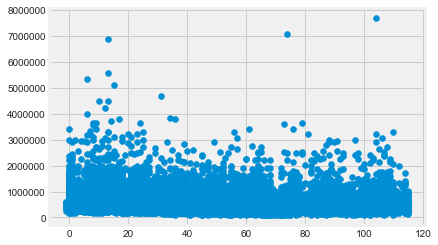

In [44]:
plt.scatter(df_housing['age_house'], df_housing['price']);

Columns 'age_house' has the correct int data types.<br>

In [45]:
df_housing['age_house'].dtype

dtype('int64')

In [46]:
df_housing.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_house
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63


In [47]:
#date doesn't show up
df_housing.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_house
count,2.153400e+04,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,17704.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000
mean,4.582351e+09,540057.664,3.373,2.116,2079.828,15090.596,1.494,0.007,0.234,3.410,7.657,1788.558,285.244,1971.002,83.765,98077.939,47.560,-122.214,1986.300,12751.080,2014.323,43.320
std,2.876779e+09,366059.581,0.926,0.769,917.447,41380.210,0.540,0.082,0.766,0.651,1.173,827.746,439.334,29.376,400.240,53.507,0.139,0.141,685.121,27255.483,0.467,29.378
min,1.000102e+06,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,2014.000,-1.000
25%,2.123212e+09,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,2014.000,18.000
50%,3.904945e+09,450000.000,3.000,2.250,1910.000,7617.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000,2014.000,40.000
75%,7.312175e+09,645000.000,4.000,2.500,2550.000,10687.750,2.000,0.000,0.000,4.000,8.000,2210.000,550.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,2015.000,63.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000,2015.000,115.000


### Target
The target variable is skewed.
There are a lot of outliers.

I didn't create a new column for price but for visual purposes only I did create bins according to the statistical breakdown when applying method .describe(). The largest number of homes are in the price range of 440,000 to 640,000.

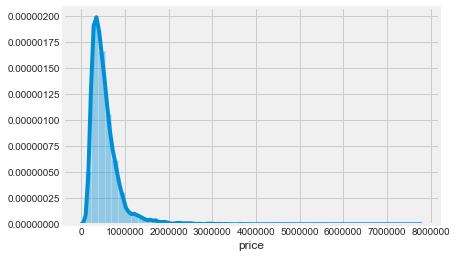

In [48]:
sns.distplot(df_housing['price']);

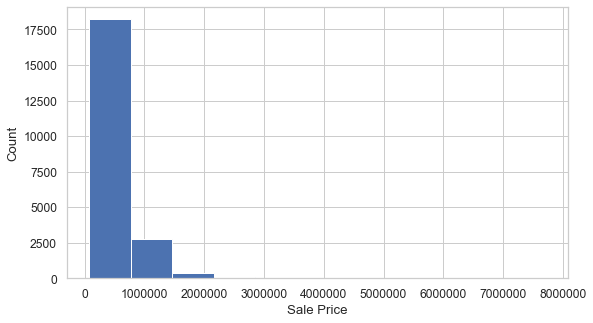

In [49]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df_housing['price'], norm_hist=False, kde=False, bins=11, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

The boxplot shows that there are a lot of outliers in the 'price'/target column.

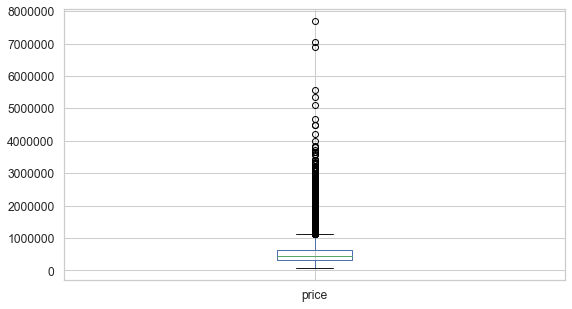

In [50]:
df_housing['price'].plot(kind='box');

I didn't create a new column for price but for visual purposes only I did create bins according to the statistical breakdown when applying method .describe(). The largest number of homes are in the price range of 440,000 to 640,000.

In [51]:
bins = [78000, 320000,440000,640000,700000]
bins_price = pd.cut(df_housing['price'], bins)
bins_price = bins_price.cat.as_ordered()
bins_price.head()

0     (78000, 320000]
1    (440000, 640000]
2     (78000, 320000]
3    (440000, 640000]
4    (440000, 640000]
Name: price, dtype: category
Categories (4, interval[int64]): [(78000, 320000] < (320000, 440000] < (440000, 640000] < (640000, 700000]]

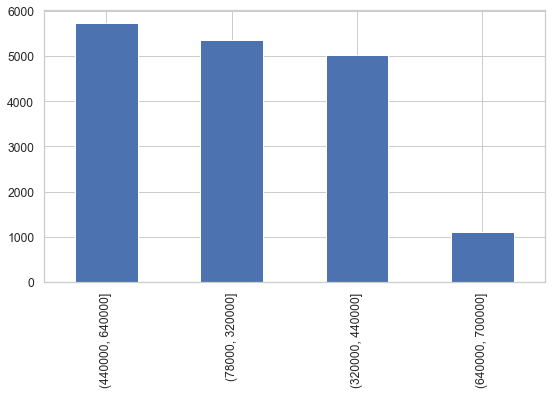

In [52]:
bins_price.value_counts().plot(kind='bar');

### Independent variables that are categorical
I didn't re-categorize any of the variables by binning and label enciding them because it would cause them to lose their meaning.<br>
The independent variables that would be considered categorical are numeric so we don't have to worry about converting them to numeric data types.<br>

In [53]:
df_housing[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade','yr_built',
            'yr_renovated','year','zipcode']].nunique()

bedrooms         12
bathrooms        29
floors            6
waterfront        2
view              5
condition         5
grade            11
yr_built        116
yr_renovated     70
year              2
zipcode          70
dtype: int64

In [54]:
df_housing['bedrooms'].value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

I considered grouping bathroom column in terms of whole numbers fo easier analysis but then a lot would be lost becuase 
there is a difference between 1 bathroom and 1 bathroom and 1/2.  

In [55]:
df_housing['bathrooms'].value_counts()

2.50    5364
1.00    3841
1.75    3035
2.25    2037
2.00    1926
1.50    1441
2.75    1185
3.00     752
3.50     730
3.25     585
3.75     155
4.00     136
4.50     100
4.25      77
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       5
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [56]:
df_housing['floors'].value_counts()

1.0    10643
2.0     8211
1.5     1903
3.0      611
2.5      159
3.5        7
Name: floors, dtype: int64

In [57]:
df_housing['waterfront'].value_counts()

0.0    21389
1.0      145
Name: waterfront, dtype: int64

In [58]:
#view-has been viewed
df_housing['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [59]:
#condition - How good the condition is (Overall)
df_housing['condition'].value_counts()

3    13981
4     5657
5     1697
2      170
1       29
Name: condition, dtype: int64

In [60]:
print(df_housing['yr_renovated'].value_counts())
print('----------------')
print(df_housing['yr_renovated'].value_counts() *100/ len(df_housing['yr_renovated']))

0.0       16961
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64
----------------
0.0       78.763815
2014.0     0.338999
2003.0     0.143958
2013.0     0.143958
2007.0     0.139315
            ...    
1946.0     0.004644
1959.0     0.004644
1971.0     0.004644
1951.0     0.004644
1954.0     0.004644
Name: yr_renovated, Length: 70, dtype: float64


In [61]:
df_housing['zipcode'].value_counts()

98103    601
98038    586
98115    580
98052    573
98117    553
        ... 
98102    104
98010    100
98024     79
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [62]:
df_housing['condition'].value_counts()

3    13981
4     5657
5     1697
2      170
1       29
Name: condition, dtype: int64

In [63]:
df_housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'age_house'],
      dtype='object')

In [64]:
#pd.plotting.scatter_matrix(df_housing, figsize=(14,14));

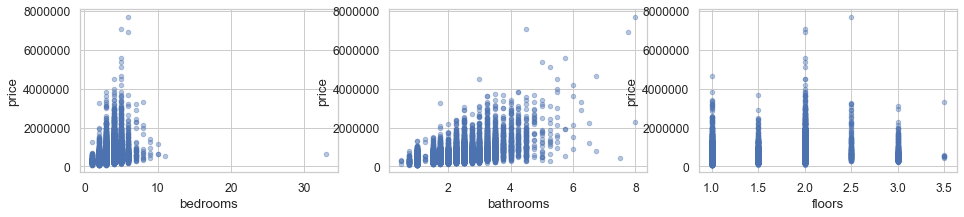

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,3))

for xcol, ax in zip(['bedrooms','bathrooms','floors'], axes):
    df_housing.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

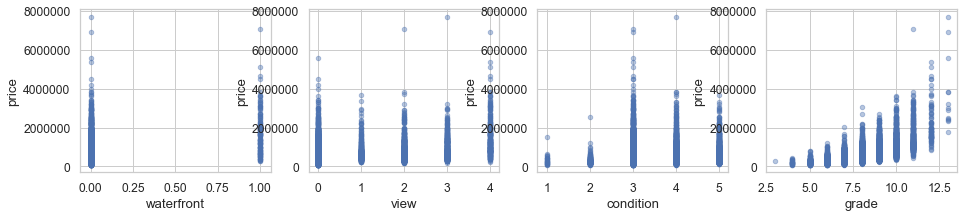

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14,3))

for xcol, ax in zip(['waterfront','view', 'condition', 'grade'], axes):
    df_housing.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

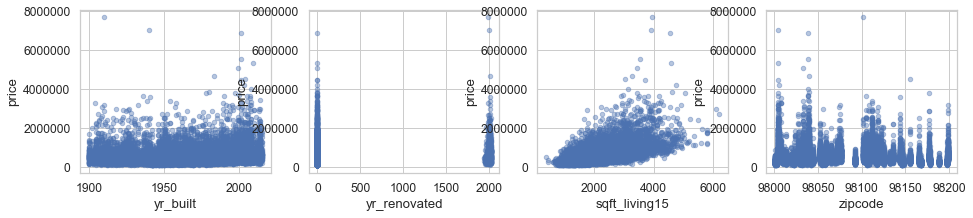

In [67]:
#'yr_built','yr_renovated'
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14,3))

for xcol, ax in zip(['yr_built','yr_renovated','sqft_living15','zipcode'], axes):
    df_housing.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

The columns 'yr_built'appears to be linear.  The column 'yr_renovated' wasn't categorcial but I label encoded so home was either renovated or not.  The marity of homes were not renovated.<br>
There doesn't seem to be a linear looking relationship between predcitor variables and target.<br>  
<br>
The following columns are already categorcial form: bedrooms, floors, waterfront, view, condition, grade, zipcode.<br>
A histogram of yr_built tells us how many home were built every ten years.  However,I thought it made better sense to create bins of year around quartiles which would also make it a categorical variable.<br>

In [68]:
#df_housing.head()

In [69]:
#df_categories = df_housing

#### Categorical variable 'yr_built'
A histogram of yr_built tells us how many home were built every ten years.  I thought it made better sense to create bins of year around quartiles which would also make it a categorical variable and easier to interpret visually.  However, it did not help my statsmodel, so I maintained it as it is.<br>

In [70]:
#df_categories['yr_built'].describe()

The average number of homes were built around 1971.<br>

In [71]:
#df_categories['yr_built'].hist();

In [72]:
"""
bins=[1890,1950,1974,1996,2016]
bins_yr_built = pd.cut(df_categories['yr_built'], bins)
bins_yr_built = bins_yr_built.cat.as_ordered()
bins_yr_built.head()
"""

"\nbins=[1890,1950,1974,1996,2016]\nbins_yr_built = pd.cut(df_categories['yr_built'], bins)\nbins_yr_built = bins_yr_built.cat.as_ordered()\nbins_yr_built.head()\n"

The largest number of homes were built from 1950 to 1974.<br>
The least number of homes were  built from 1900 to 1950.<br>

In [73]:
#bins_yr_built.value_counts().plot(kind='bar');

In [74]:
#df_categories['yr_built']= bins_yr_built
#df_categories['yr_built'] = df_categories['yr_built'].cat.codes

In [75]:
#df_categories['yr_built'].value_counts()

In [76]:
housingcols = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'age_house']

In [77]:
df_categories = df_housing[housingcols]

In [78]:
year_built_cat = df_categories['yr_built']

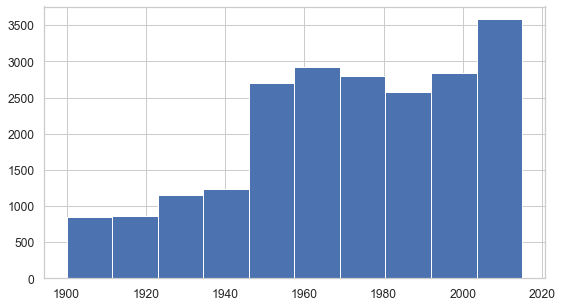

In [79]:
year_built_cat.hist();

In [80]:
bins=[1890,1950,1974,1996,2016]
bins_yr_built = pd.cut(year_built_cat, bins)
bins_yr_built = bins_yr_built.cat.as_ordered()
bins_yr_built.head()

0    (1950, 1974]
1    (1950, 1974]
2    (1890, 1950]
3    (1950, 1974]
4    (1974, 1996]
Name: yr_built, dtype: category
Categories (4, interval[int64]): [(1890, 1950] < (1950, 1974] < (1974, 1996] < (1996, 2016]]

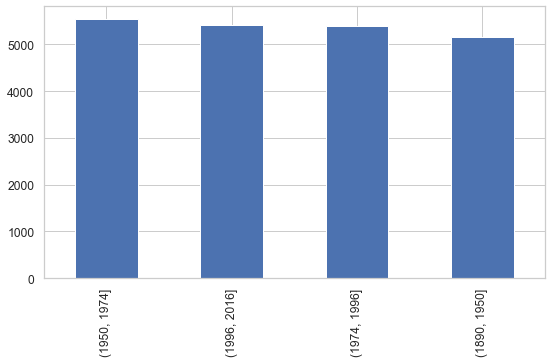

In [81]:
bins_yr_built.value_counts().plot(kind='bar');

In [82]:
year_built_cat= bins_yr_built
year_built_cat = year_built_cat.cat.codes
year_built_cat.value_counts()

1    5540
3    5422
2    5404
0    5168
dtype: int64

#### Categorical variable yr_renovated'
Column 'yr_renovated' is a problem b/c the majority of homes were not renovated, so it's easier to just group them in terms of properties that haven't been renovated (0) and those that have(1).

In [83]:
df_categories['yr_renovated'].describe()

count    17704.000000
mean        83.765025
std        400.239690
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [84]:
df_categories['yr_renovated'].value_counts()

0.0       16961
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

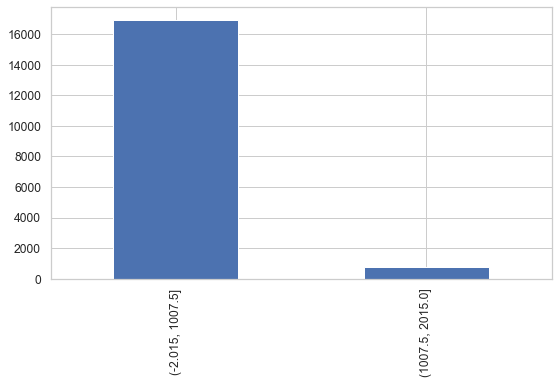

In [85]:
bins_yr_renovated = pd.cut(df_categories['yr_renovated'], 2)
bins_yr_renovated.value_counts().plot(kind='bar');

In [86]:
df_categories['yr_renovated']= bins_yr_renovated
df_categories['yr_renovated'] = abs(df_categories['yr_renovated'].cat.codes)

In [87]:
df_categories['yr_renovated']. value_counts()

0    16961
1     4573
Name: yr_renovated, dtype: int64

In [88]:
df_categories.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_house
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,1,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


In [89]:
df_categories.shape

(21534, 23)

### Collinearity

In [90]:
def multiplot(corr,figsize=(25,10)):
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True

    sns.heatmap(np.abs(corr),square=True, mask=mask,annot=True,cmap="Reds",ax=ax)
    return fig, ax


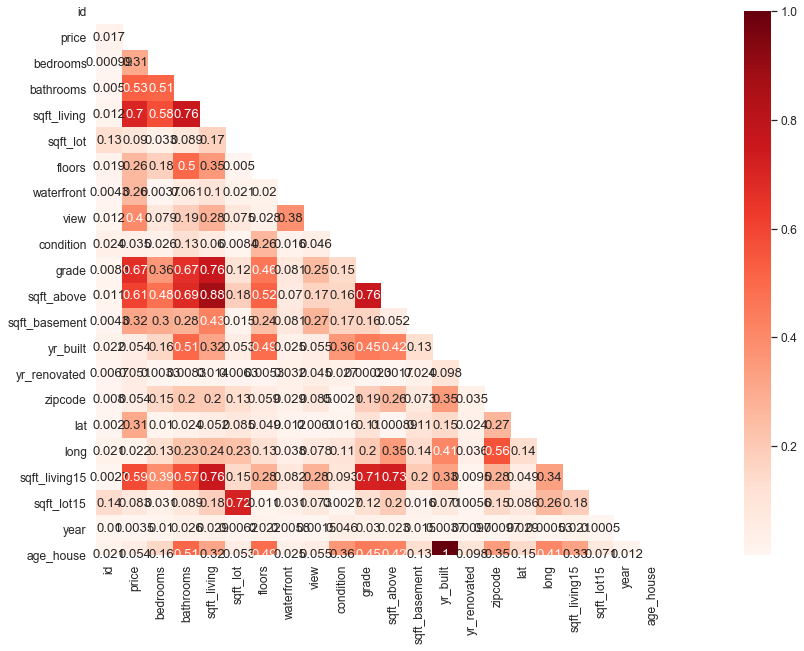

In [91]:
multiplot(np.abs(df_categories.corr()));

There was only a colinearity between sqft_above and sqft_living of 0.88.  I deleted sqft_living because it had a lower collinearity with price.<br>
Column 'sqft_above' had a collinearity of 0.76, but I left it in because it was close to 0.75.<br> 

In [92]:
df_housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'age_house'],
      dtype='object')

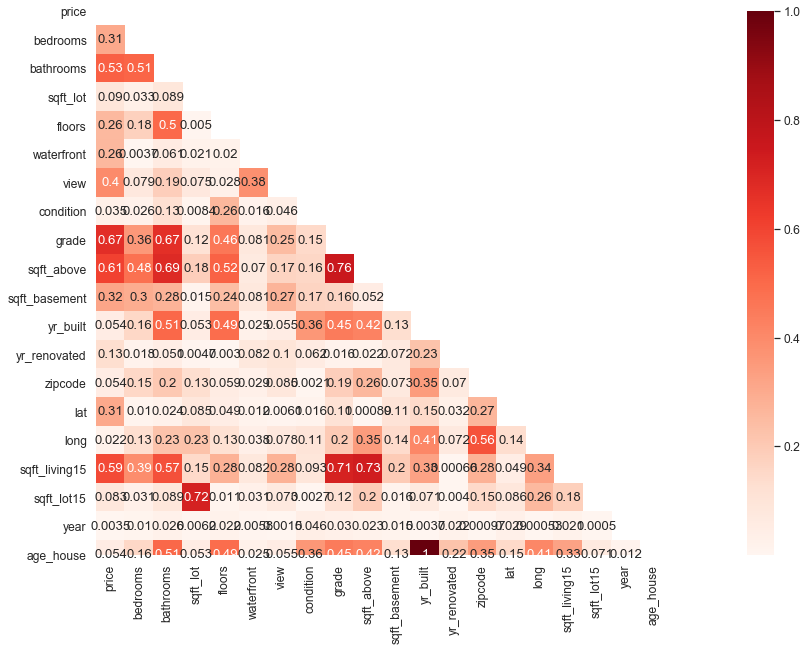

In [93]:
#--only sqft_living was deleted 11/13/19

collin_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 
              'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year','age_house']

collin_df = df_housing[collin_cols]
multiplot(np.abs(collin_df.corr()));

### Linearity

In [94]:
print(df_housing.shape)
print(collin_df.shape)

(21534, 23)
(21534, 20)


In [95]:
collin_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'age_house'],
      dtype='object')

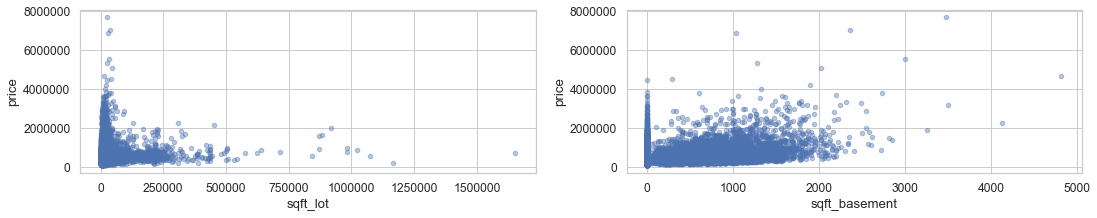

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['sqft_lot','sqft_basement'], axes):
    collin_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

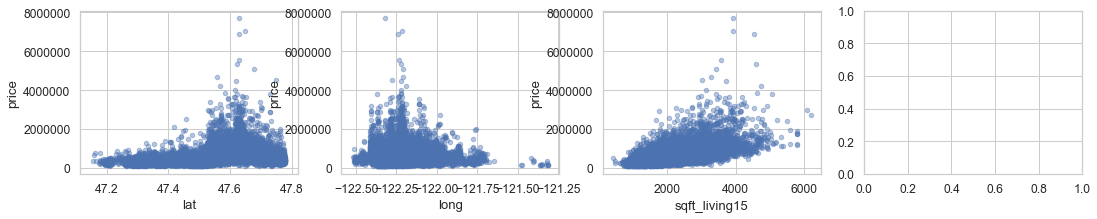

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['lat', 'long', 'sqft_living15'], axes):
    collin_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

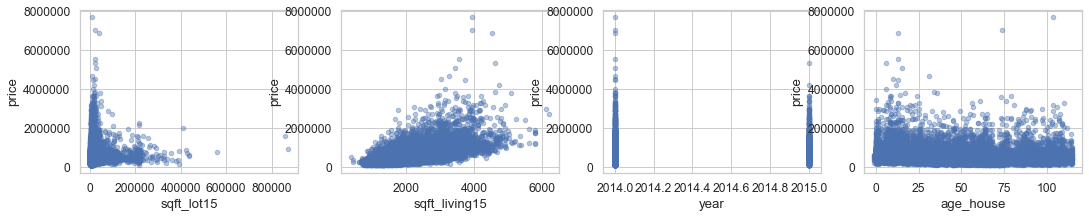

In [98]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_lot15', 'sqft_living15','year','age_house'], axes):
    collin_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

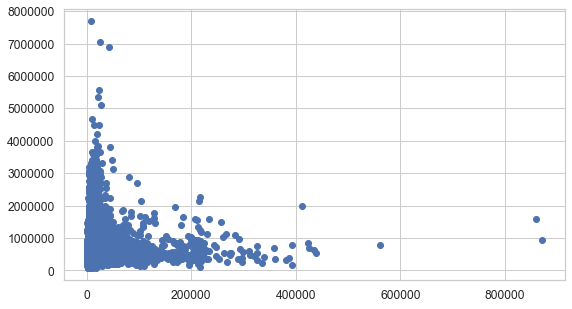

In [99]:
plt.scatter(collin_df['sqft_lot15'], collin_df['price']);

### Normalization
normalization-process of making data distribution more normally distributed.<br>
log gves you a more normal distribution.<br>
remove outliers, consider Z-score, IQR.<br>

In [100]:
#collin_df.columns
collin_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 
              'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year','age_house']
df_norm = collin_df[collin_cols]

Can't check if 'date' is normally distributed as a datetime datatype.<br>

In [101]:
df_norm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'age_house'],
      dtype='object')

In [102]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     17704 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
year             21534 non-null int64
age_house        21534 non-null int64
dtypes: float64(9), int64(11)
memory usage: 3.5 MB


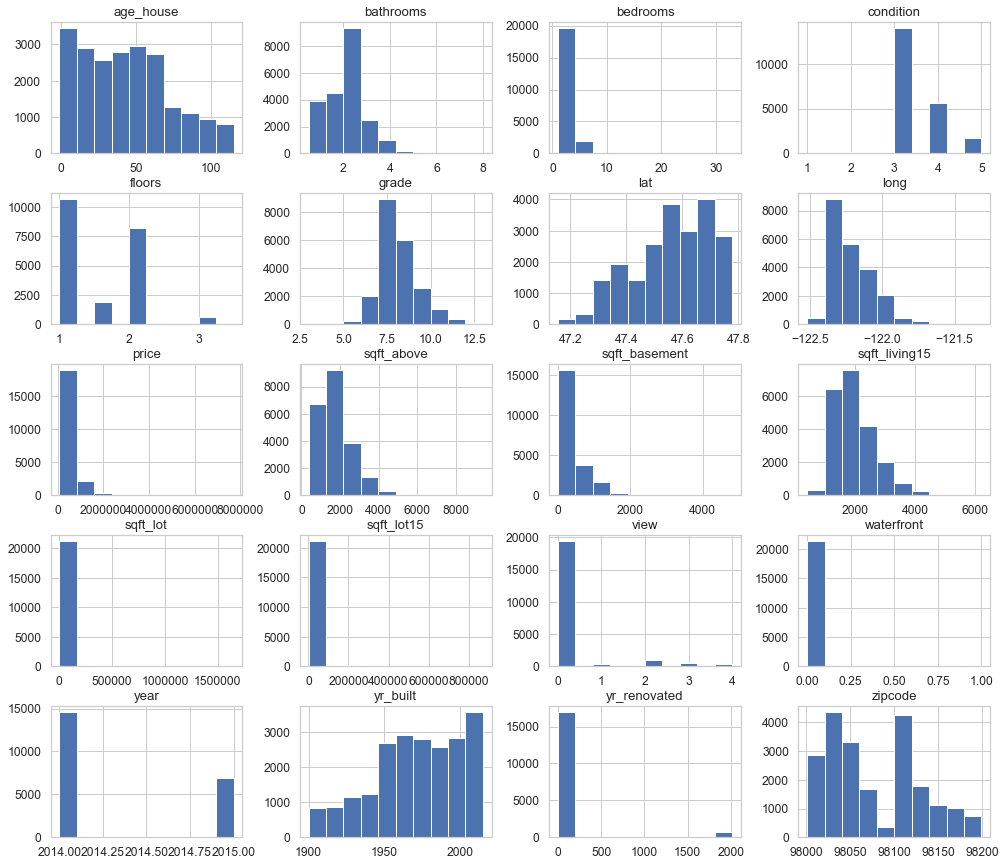

In [103]:
#df_norm.hist(figsize=(13,13));
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df_norm.hist(ax = ax);

In [104]:
df_norm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'age_house'],
      dtype='object')

The categorical variables are: bedrooms, bathrooms, floors, waterfront,view, condition, grade, zipcode.  The log normalization is not applied to categorical variables.<br>

In [105]:
"""
data_log = pd.DataFrame([ ])
#data_log['logage'] = np.log(df_norm['age_house'])
#data_log['logbath'] = np.log(df_norm['bathrooms'])
#data_log['logbed'] = np.log(df_norm['bedrooms'])
data_log['loglat'] = np.log(df_norm['lat'])
data_log['loglong'] = np.log(df_norm['long'])
data_log['logsqftliving15'] = np.log(df_norm['sqft_living15'])
#data_log['logsqftbasement'] = np.log(df_norm['sqft_basement'])
data_log.hist(figsize  = [8, 8]);
"""
print('Do I need this?')

Do I need this?


Normalization

In [106]:
df_norm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'age_house'],
      dtype='object')

I couldn't apply log to long because all I got was a balnk screen.<br>

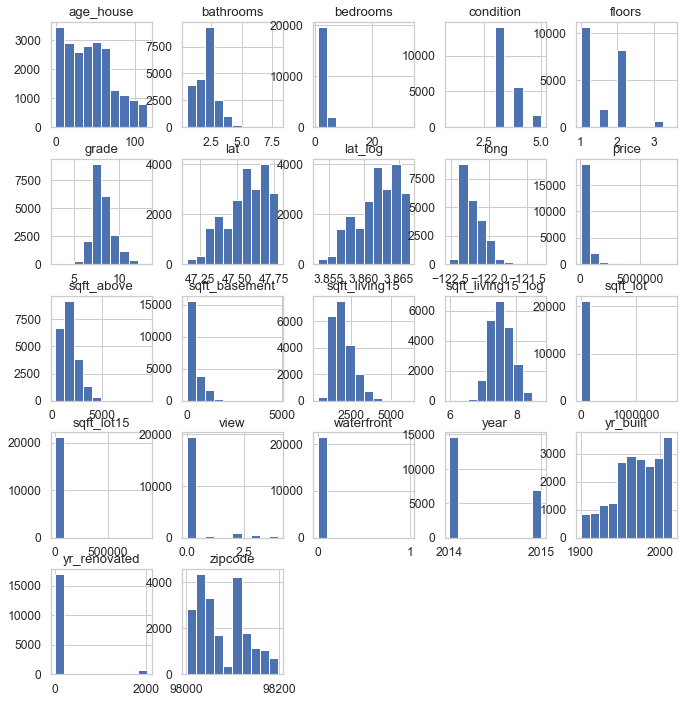

In [107]:
#transforming non-normal features
#let's try to make our data look more normal, and 
#second, let's perform feature scaling to manage the difference in magnitude!
#pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

log_cols =['lat','sqft_living15']
def normalize_log(df):
    for col in log_cols:
        #housing_df_1[col+'_log'] = np.log(housing_df_1[col])
        df[col+'_log'] = np.log(df[col])
    df.hist(figsize=(10,12));  
normalize_log(df_norm)        

### Standardization
not transforming categorical<br>
x' will have mean  𝜇=0  and  𝜎=1<br>

In [108]:
df_norm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'age_house', 'lat_log', 'sqft_living15_log'],
      dtype='object')

In [109]:
standard_cols = ['sqft_above', 'sqft_basement', 'yr_built', 'long', 'sqft_living15', 'sqft_lot15', 'lat_log','age_house']

df_standard = df_norm[standard_cols]

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_standard)

In [111]:
kc_scaled = pd.DataFrame(data=scaled_data,columns=df_standard.columns)
kc_scaled.describe().round(3)

,sqft_above,sqft_basement,yr_built,long,sqft_living15,sqft_lot15,lat_log,age_house
count,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000
mean,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.714,-0.649,-2.417,-2.168,-2.317,-0.444,-2.927,-1.509
25%,-0.723,-0.649,-0.681,-0.810,-0.724,-0.281,-0.641,-0.862
50%,-0.276,-0.649,0.136,-0.114,-0.214,-0.188,0.086,-0.113
75%,0.509,0.603,0.885,0.632,0.545,-0.098,0.851,0.670
max,9.208,10.322,1.498,6.388,6.165,31.497,1.566,2.440


In [112]:
df_housing.shape

(21534, 23)

In [113]:
type(scaled_data), scaled_data.shape

(numpy.ndarray, (21534, 8))

In [114]:
df_housing['date'].dtype

dtype('O')

In [115]:
#everythin now ecept 'price' has mean of 0.
kc_scaled['price'] = df_housing['price']
#kc_scaled['date'] = df_housing['date']
kc_scaled.describe().round(3)

,sqft_above,sqft_basement,yr_built,long,sqft_living15,sqft_lot15,lat_log,age_house,price
count,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21472.000
mean,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,539801.045
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,365593.782
min,-1.714,-0.649,-2.417,-2.168,-2.317,-0.444,-2.927,-1.509,78000.000
25%,-0.723,-0.649,-0.681,-0.810,-0.724,-0.281,-0.641,-0.862,321020.250
50%,-0.276,-0.649,0.136,-0.114,-0.214,-0.188,0.086,-0.113,450000.000
75%,0.509,0.603,0.885,0.632,0.545,-0.098,0.851,0.670,645000.000
max,9.208,10.322,1.498,6.388,6.165,31.497,1.566,2.440,7700000.000


In [116]:
kc_scaled.head(2)

,sqft_above,sqft_basement,yr_built,long,sqft_living15,sqft_lot15,lat_log,age_house,price
0,-0.735216,-0.64928,-0.544752,-0.305912,-0.943359,-0.260544,-0.352053,0.533735,221900.0
1,0.460832,0.26121,-0.680920,-0.746467,-0.432488,-0.187566,1.159617,0.669894,538000.0


In [117]:
df_filter = kc_scaled.copy()
df_filter.columns

Index(['sqft_above', 'sqft_basement', 'yr_built', 'long', 'sqft_living15',
       'sqft_lot15', 'lat_log', 'age_house', 'price'],
      dtype='object')

In [118]:
filter_cols = ['sqft_above', 'sqft_basement', 'sqft_lot15', 'lat_log', 'age_house']

In [119]:
df_filter = pd.DataFrame()
for col in filter_cols:
    abs_vals = np.abs(kc_scaled[col])>3
    df_filter[col] = np.where(abs_vals==True,np.nan,kc_scaled[col])#[housing_df_2['sqft_lot15']<3]
df_filter.head()

#True == NaN
#df_filter['check_outliers'] = 

,sqft_above,sqft_basement,sqft_lot15,lat_log,age_house
0,-0.735216,-0.649280,-0.260544,-0.352053,0.533735
1,0.460832,0.261210,-0.187566,1.159617,0.669894
2,-1.230549,-0.649280,-0.172046,1.281098,1.316651
3,-0.892273,1.422084,-0.284393,-0.282737,0.193337
4,-0.131151,-0.649280,-0.192556,0.409658,-0.521500


In [120]:
cat_cols = ['bedrooms', 'bathrooms', 'floors', 'yr_renovated','waterfront', 'view', 'condition', 'grade','zipcode']

In [121]:
for col in cat_cols:
    df_filter[col] = df_housing[col].copy()

In [122]:
df_filter.head()

,sqft_above,sqft_basement,sqft_lot15,lat_log,age_house,bedrooms,bathrooms,floors,yr_renovated,waterfront,view,condition,grade,zipcode
0,-0.735216,-0.649280,-0.260544,-0.352053,0.533735,3.0,1.00,1.0,0.0,0.0,0.0,3.0,7.0,98178.0
1,0.460832,0.261210,-0.187566,1.159617,0.669894,3.0,2.25,2.0,1991.0,0.0,0.0,3.0,7.0,98125.0
2,-1.230549,-0.649280,-0.172046,1.281098,1.316651,2.0,1.00,1.0,NaN,0.0,0.0,3.0,6.0,98028.0
3,-0.892273,1.422084,-0.284393,-0.282737,0.193337,4.0,3.00,1.0,0.0,0.0,0.0,5.0,7.0,98136.0
4,-0.131151,-0.649280,-0.192556,0.409658,-0.521500,3.0,2.00,1.0,0.0,0.0,0.0,3.0,8.0,98074.0


In [123]:
df_filter['price'] = df_housing['price'].copy()

In [124]:
df_filter.head()

,sqft_above,sqft_basement,sqft_lot15,lat_log,age_house,bedrooms,bathrooms,floors,yr_renovated,waterfront,view,condition,grade,zipcode,price
0,-0.735216,-0.649280,-0.260544,-0.352053,0.533735,3.0,1.00,1.0,0.0,0.0,0.0,3.0,7.0,98178.0,221900.0
1,0.460832,0.261210,-0.187566,1.159617,0.669894,3.0,2.25,2.0,1991.0,0.0,0.0,3.0,7.0,98125.0,538000.0
2,-1.230549,-0.649280,-0.172046,1.281098,1.316651,2.0,1.00,1.0,NaN,0.0,0.0,3.0,6.0,98028.0,180000.0
3,-0.892273,1.422084,-0.284393,-0.282737,0.193337,4.0,3.00,1.0,0.0,0.0,0.0,5.0,7.0,98136.0,604000.0
4,-0.131151,-0.649280,-0.192556,0.409658,-0.521500,3.0,2.00,1.0,0.0,0.0,0.0,3.0,8.0,98074.0,510000.0


In [125]:
print(df_filter.shape)

(21534, 15)


In [126]:
try:
    df_filter.dropna(inplace=True)
except:
    print('NaN in the dataframe.')   

In [127]:
print(df_filter.shape)

(16982, 15)


In [128]:
df_filter.isna().sum()

sqft_above       0
sqft_basement    0
sqft_lot15       0
lat_log          0
age_house        0
bedrooms         0
bathrooms        0
floors           0
yr_renovated     0
waterfront       0
view             0
condition        0
grade            0
zipcode          0
price            0
dtype: int64

In [129]:
df_filter.to_csv('my_df_filter.csv')

In [130]:
df_filter.describe().round(3)

,sqft_above,sqft_basement,sqft_lot15,lat_log,age_house,bedrooms,bathrooms,floors,yr_renovated,waterfront,view,condition,grade,zipcode,price
count,16982.000,16982.000,16982.000,16982.000,16982.000,16982.000,16982.000,16982.000,16982.000,16982.000,16982.000,16982.000,16982.000,16982.000,16982.000
mean,-0.066,-0.039,-0.117,-0.002,0.012,3.377,2.117,1.494,83.321,0.007,0.231,3.412,7.658,98077.691,538954.963
std,0.897,0.914,0.361,1.000,1.003,0.932,0.764,0.538,399.200,0.082,0.761,0.653,1.166,53.456,360865.616
min,-1.714,-0.649,-0.444,-2.927,-1.509,1.000,0.500,1.000,0.000,0.000,0.000,1.000,3.000,98001.000,80000.000
25%,-0.735,-0.649,-0.283,-0.648,-0.862,3.000,1.750,1.000,0.000,0.000,0.000,3.000,7.000,98033.000,321145.250
50%,-0.312,-0.649,-0.193,0.077,-0.113,3.000,2.250,1.500,0.000,0.000,0.000,3.000,7.000,98065.000,450000.000
75%,0.437,0.557,-0.108,0.857,0.670,4.000,2.500,2.000,0.000,0.000,0.000,4.000,8.000,98117.000,645000.000
max,2.998,2.993,2.975,1.566,2.440,33.000,8.000,3.500,2015.000,1.000,4.000,5.000,13.000,98199.000,7700000.000


In [131]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [132]:
cols = df_filter.drop(['price','sqft_lot15','lat_log'],axis=1).columns
str_cols = ' + '.join(cols)
str_cols

'sqft_above + sqft_basement + age_house + bedrooms + bathrooms + floors + yr_renovated + waterfront + view + condition + grade + zipcode'

In [133]:
formula = 'price~'+str_cols
formula

'price~sqft_above + sqft_basement + age_house + bedrooms + bathrooms + floors + yr_renovated + waterfront + view + condition + grade + zipcode'

In [134]:
model = smf.ols(formula=formula, data=df_filter).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     1760.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:58:21   Log-Likelihood:            -2.3454e+05
No. Observations:               16982   AIC:                         4.691e+05
Df Residuals:                   16969   BIC:                         4.692e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.926e+07   3.53e+06    -11.108      0.000   -4.62e+07   -3.23e+07
sqft_above     4103.7452   2299.883      1.784      0.074    -404.265    8611.755
sqft_basement  2727.2096   2054.963      1.327      0.184   -1300.731    6755.150
age_house      6431.5060   2087.752      3.081      0.002    2339.295    1.05e+04
bedrooms       1.451e+04   2332.162      6.223      0.000    9942.880    1.91e+04
bathrooms      6.747e+04   3740.904     18.035      0.000    6.01e+04    7.48e+04
floors        -3.279e+04   4230.792     -7.749      0.000   -4.11e+04   -2.45e+04
yr_renovated     81.1225      4.693     17.286      0.000      71.924      90.321
waterfront     5.922e+05   2.45e+04     24.172      0.000    5.44e+05     6.4e+05
view           7.348e+04   2767.608     26.549      0.000    6.81e+04    7.89e+04
condition      6.451e+04   2963.807     21.767      0.000    5.87e+04    7.03e+04
grade          1.735e+05   2223.328     78.053      0.000    1.69e+05    1.78e+05
zipcode         388.2909     36.014     10.782      0.000     317.700     458.882
==============================================================================
Omnibus:                    13992.863   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1255386.452
Skew:                           3.419   Prob(JB):                         0.00
Kurtosis:                      44.563   Cond. No.                     1.88e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### QQ-plot

The normality assumption states that the model residuals should follow a normal distribution.<br>

The normality assumption talks about the model residuals and not about the distributions of the variables!
In general, data scientists will often check the distributions of the variables as well.
The easiest way to check for the normality assumption is with histograms or a Q-Q-Plots.

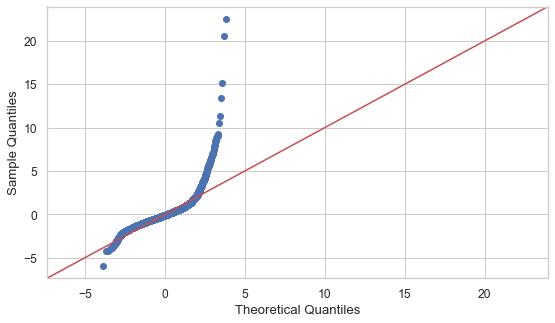

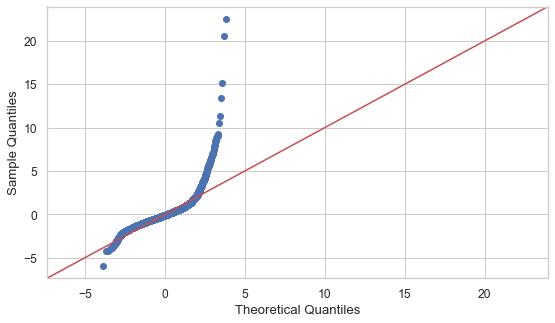

In [135]:
resids = model.resid
import scipy.stats as stats

sm.graphics.qqplot(resids,stats.norm,line='45',fit=True)

## 2nd Statsmodel
This time I hot encoded column 'zipcode' to see if it make a difference in my R2 score.<br>

In [136]:
df_norm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'age_house', 'lat_log', 'sqft_living15_log'],
      dtype='object')

In [137]:
zipcode_dummy = pd.get_dummies(df_norm['zipcode'], prefix='zip', drop_first=True)
df_house_features = df_norm.drop(['zipcode'], axis=1)
house_features = pd.concat([df_house_features, zipcode_dummy], axis=1)

In [138]:
house_features.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year',
       'age_house', 'lat_log', 'sqft_living15_log', 'zip_98002', 'zip_98003',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022',
       'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034',
       'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058',
       'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074',
       'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103',
       'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109',
       'zip_98112', 'zip_98115', 'zip_98

In [139]:
house_features.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,age_house,lat_log,sqft_living15_log,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650,2014,59,3.860965,7.200425,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639,2014,63,3.865372,7.432484,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,47.7379,-122.233,2720,8062,2015,82,3.865726,7.908387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000,2014,49,3.861168,7.215240,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503,2015,28,3.863186,7.495542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [140]:
#high p-value removed 'sqft_above',
stand_cols = [ 'sqft_above','sqft_basement', 'yr_built', 'long', 'sqft_living15', 'sqft_lot15', 'lat_log','age_house',
             'zip_98002',
       'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007',
       'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019',
       'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028',
       'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033',
       'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042',
       'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056',
       'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072',
       'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102',
       'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108',
       'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117',
       'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126',
       'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146', 'zip_98148',
       'zip_98155', 'zip_98166', 'zip_98168', 'zip_98177', 'zip_98178',
       'zip_98188', 'zip_98198', 'zip_98199']

df_standard_zip = house_features[stand_cols]

In [141]:
df_standard_zip.head()

,sqft_above,sqft_basement,yr_built,long,sqft_living15,sqft_lot15,lat_log,age_house,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,1180,0.0,1955,-122.257,1340,5650,3.860965,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2170,400.0,1951,-122.319,1690,7639,3.865372,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,770,0.0,1933,-122.233,2720,8062,3.865726,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1050,910.0,1965,-122.393,1360,5000,3.861168,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1680,0.0,1987,-122.045,1800,7503,3.863186,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_standard_zip)

In [143]:
kc_scaled_zip = pd.DataFrame(data=scaled_data,columns=df_standard_zip.columns)
kc_scaled_zip.describe().round(3)

,sqft_above,sqft_basement,yr_built,long,sqft_living15,sqft_lot15,lat_log,age_house,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
count,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.00,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000
mean,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.00,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.714,-0.649,-2.417,-2.168,-2.317,-0.444,-2.927,-1.509,-0.097,-0.115,-0.122,-0.089,-0.154,-0.081,-0.115,-0.068,-0.095,-0.076,-0.094,-0.104,-0.153,-0.061,-0.139,-0.115,-0.123,-0.110,-0.113,-0.076,-0.143,-0.161,-0.167,-0.048,-0.115,-0.161,-0.102,-0.165,-0.138,-0.112,-0.138,-0.147,-0.149,-0.120,-0.074,-0.113,-0.144,-0.13,-0.096,-0.128,-0.070,-0.169,-0.104,-0.126,-0.112,-0.093,-0.071,-0.112,-0.166,-0.124,-0.162,-0.155,-0.093,-0.117,-0.139,-0.129,-0.153,-0.111,-0.127,-0.116,-0.052,-0.145,-0.109,-0.112,-0.109,-0.111,-0.080,-0.114,-0.122
25%,-0.723,-0.649,-0.681,-0.810,-0.724,-0.281,-0.641,-0.862,-0.097,-0.115,-0.122,-0.089,-0.154,-0.081,-0.115,-0.068,-0.095,-0.076,-0.094,-0.104,-0.153,-0.061,-0.139,-0.115,-0.123,-0.110,-0.113,-0.076,-0.143,-0.161,-0.167,-0.048,-0.115,-0.161,-0.102,-0.165,-0.138,-0.112,-0.138,-0.147,-0.149,-0.120,-0.074,-0.113,-0.144,-0.13,-0.096,-0.128,-0.070,-0.169,-0.104,-0.126,-0.112,-0.093,-0.071,-0.112,-0.166,-0.124,-0.162,-0.155,-0.093,-0.117,-0.139,-0.129,-0.153,-0.111,-0.127,-0.116,-0.052,-0.145,-0.109,-0.112,-0.109,-0.111,-0.080,-0.114,-0.122
50%,-0.276,-0.649,0.136,-0.114,-0.214,-0.188,0.086,-0.113,-0.097,-0.115,-0.122,-0.089,-0.154,-0.081,-0.115,-0.068,-0.095,-0.076,-0.094,-0.104,-0.153,-0.061,-0.139,-0.115,-0.123,-0.110,-0.113,-0.076,-0.143,-0.161,-0.167,-0.048,-0.115,-0.161,-0.102,-0.165,-0.138,-0.112,-0.138,-0.147,-0.149,-0.120,-0.074,-0.113,-0.144,-0.13,-0.096,-0.128,-0.070,-0.169,-0.104,-0.126,-0.112,-0.093,-0.071,-0.112,-0.1

In [144]:
house_features.shape

(21534, 90)

In [145]:
kc_scaled_zip.shape

(21534, 77)

In [146]:
#everythin now ecept 'price' has mean of 0.
kc_scaled_zip['price'] = house_features['price']
#kc_scaled['date'] = df_housing['date']
kc_scaled_zip.describe().round(3)

,sqft_above,sqft_basement,yr_built,long,sqft_living15,sqft_lot15,lat_log,age_house,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,price
count,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.00,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21472.000
mean,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.00,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,539801.045
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,365593.782
min,-1.714,-0.649,-2.417,-2.168,-2.317,-0.444,-2.927,-1.509,-0.097,-0.115,-0.122,-0.089,-0.154,-0.081,-0.115,-0.068,-0.095,-0.076,-0.094,-0.104,-0.153,-0.061,-0.139,-0.115,-0.123,-0.110,-0.113,-0.076,-0.143,-0.161,-0.167,-0.048,-0.115,-0.161,-0.102,-0.165,-0.138,-0.112,-0.138,-0.147,-0.149,-0.120,-0.074,-0.113,-0.144,-0.13,-0.096,-0.128,-0.070,-0.169,-0.104,-0.126,-0.112,-0.093,-0.071,-0.112,-0.166,-0.124,-0.162,-0.155,-0.093,-0.117,-0.139,-0.129,-0.153,-0.111,-0.127,-0.116,-0.052,-0.145,-0.109,-0.112,-0.109,-0.111,-0.080,-0.114,-0.122,78000.000
25%,-0.723,-0.649,-0.681,-0.810,-0.724,-0.281,-0.641,-0.862,-0.097,-0.115,-0.122,-0.089,-0.154,-0.081,-0.115,-0.068,-0.095,-0.076,-0.094,-0.104,-0.153,-0.061,-0.139,-0.115,-0.123,-0.110,-0.113,-0.076,-0.143,-0.161,-0.167,-0.048,-0.115,-0.161,-0.102,-0.165,-0.138,-0.112,-0.138,-0.147,-0.149,-0.120,-0.074,-0.113,-0.144,-0.13,-0.096,-0.128,-0.070,-0.169,-0.104,-0.126,-0.112,-0.093,-0.071,-0.112,-0.166,-0.124,-0.162,-0.155,-0.093,-0.117,-0.139,-0.129,-0.153,-0.111,-0.127,-0.116,-0.052,-0.145,-0.109,-0.112,-0.109,-0.111,-0.080,-0.114,-0.122,321020.250
50%,-0.276,-0.649,0.136,-0.114,-0.214,-0.188,0.086,-0.113,-0.097,-0.115,-0.122,-0.089,-0.154,-0.081,-0.115,-0.068,-0.095,-0.076,-0.094,-0.104,-0.153,-0.061,-0.139,-0.115,-0.123,-0.110,-0.113,-0.076,-0.143,-0.161,-0.167,-0.048,-0.115,-0.161,-0.102,-0.165,-0.138,-0.112,-0.138,-0.147,-0.149,-0.120,-0.074,-0.113,-0.144,-0.13,-0.096,-0.128,-

In [147]:

filter_cols = ['sqft_above', 'sqft_basement', 'yr_built','long', 
               'sqft_living15', 'sqft_lot15', 'lat_log', 'age_house','zip_98002',
       'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007',
       'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019',
       'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028',
       'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033',
       'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042',
       'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056',
       'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072',
       'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102',
       'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108',
       'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117',
       'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126',
       'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146', 'zip_98148',
       'zip_98155', 'zip_98166', 'zip_98168', 'zip_98177', 'zip_98178',
       'zip_98188', 'zip_98198', 'zip_98199']


In [148]:
kc_scaled_zip.head()

,sqft_above,sqft_basement,yr_built,long,sqft_living15,sqft_lot15,lat_log,age_house,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,price
0,-0.735216,-0.649280,-0.544752,-0.305912,-0.943359,-0.260544,-0.352053,0.533735,-0.096578,-0.114778,-0.122037,-0.088673,-0.153704,-0.081185,-0.115399,-0.068304,-0.095346,-0.076103,-0.094349,-0.10436,-0.153388,-0.060681,-0.139144,-0.115193,-0.123013,-0.109687,-0.113316,-0.076103,-0.14308,-0.16114,-0.167254,-0.048242,-0.11457,-0.16114,-0.101597,-0.165337,-0.137925,-0.11226,-0.1381,-0.146755,-0.14905,-0.120261,-0.073912,-0.112894,-0.144426,-0.130207,-0.096333,-0.128351,-0.069664,-0.169442,-0.103676,-0.125709,-0.111835,-0.093342,-0.071327,-0.11226,-0.166372,-0.124368,-0.162349,-0.154966,-0.092835,-0.116633,-0.138796,-0.129096,-0.152911,-0.110551,-0.126847,-0.116223,-0.051517,-0.145262,-0.109035,-0.11226,-0.109252,9.010596,-0.079723,-0.114362,-0.122037,221900.0
1,0.460832,0.261210,-0.680920,-0.746467,-0.432488,-0.187566,1.159617,0.669894,-0.096578,-0.114778,-0.122037,-0.088673,-0.153704,-0.081185,-0.115399,-0.068304,-0.095346,-0.076103,-0.094349,-0.10436,-0.153388,-0.060681,-0.139144,-0.115193,-0.123013,-0.109687,-0.113316,-0.076103,-0.14308,-0.16114,-0.167254,-0.048242,-0.11457,-0.16114,-0.101597,-0.165337,-0.137925,-0.11226,-0.1381,-0.146755,-0.14905,-0.120261,-0.073912,-0.112894,-0.144426,-0.130207,-0.096333,-0.128351,-0.069664,-0.169442,-0.103676,-0.125709,-0.111835,-0.093342,-0.071327,-0.11226,-0.166372,-0.124368,-0.162349,-0.154966,-0.092835,-0.116633,7.204796,-0.129096,-0.152911,-0.110551,-0.126847,-0.116223,-0.051517,-0.145262,-0.109035,-0.11226,-0.109252,-0.110980,-0.079723,-0.114362,-0.122037,538000.0
2,-1.230549,-0.649280,-1.293679,-0.135375,1.070931,-0.172046,1.281098,1.316651,-0.096578,-0.114778,-0.122037,-0.088673,-0.153704,-0.081185,-0.115399,-0.068304,-0.095346,-0.076103,-0.094349,-0.10436,-0.153388,-0.060681,-0.139144,8.681112,-0.123013,-0.109687,-0.113316,-0.076103,-0.14308,-0.16114,-0.167254,-0.048242,-0.11457,-0.16114,-0.101597,-0.165337,-0.137925,-0.11226,-0.1381,-0.146755,-0.14905,-0.120261,-0.073912,-0.112894,-0.144426,-0.130207,-0.096333,-0.128351,-0.069664,-0.169442,-0.103676,-0.125709,-0.111835,-0.093342,-0.071327,-0.11226,-0.166372,-0.124368,-0.162349,-0.154966,-0.092835,-0.116633,-0.138796,-0.129096,-0.152911,-0.110551,-0.126847,-0.116223,-0.051517,-0.145262,-0.109035,-0.11226,-0.109252,-0.110980,-0.079723,-0.114362,-0.122037,180000.0
3,-0.892273,1.422084,-0.204330,-1.272291,-0.914166,-0.284393,-0.282737,0.193337,-0.096578,-0.114778,-0.122037,-0.088673,-0.153704,-0.081185,-0.115399,-0.068304,-0.095346,-0.076103,-0.094349,-0.10436,-0.153388,-0.060681,-0.139144,-0.115193,-0.123013,-0.109687,-0.113316,-0.076103,-0.14308,-0.16114,-0.167254,-0.048242,-0.11457,-0.16114,-0.101597,-0.165337,-0.137925,-0.11226,-0.1381,-0.146755,-0.14905,-0.120261,-0.073912,-0.112894,-0.144426,-0.130207,-0.096333,-0.128351,-0.069664,-0.169442,-0.103676,-0.125709,-0.111835,-0.093342,-0.071327,-0.11226,-0.166372,-0.124368,-0.162349,-0.154966,-0.092835,-0.116633,-0.138796,-0.129096,-0.152911,9.045611,-0.126847,-0.116223,-0.051517,-0.145262,-0.109035,-0.11226,-0.109252,-0.110980,-0.079723,-0.114362,-0.122037,604000.0
4,-0.131151,-0.649280,0.544597,1.200501,-0.271929,-0.192556,0.409658,-0.521500,-0.096578,-0.114778,-0.122037,-0.088673,-0.153704,-0.081185,-0.115399,-0.068

In [149]:
#df_filter.head()

In [150]:
df_filter_zip = pd.DataFrame()
for col in filter_cols:
    abs_vals = np.abs(kc_scaled_zip[col])>3
    df_filter_zip[col] = np.where(abs_vals==True,np.nan,kc_scaled_zip[col])#[housing_df_2['sqft_lot15']<3]
df_filter_zip.head()

,sqft_above,sqft_basement,yr_built,long,sqft_living15,sqft_lot15,lat_log,age_house,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,-0.735216,-0.649280,-0.544752,-0.305912,-0.943359,-0.260544,-0.352053,0.533735,-0.096578,-0.114778,-0.122037,-0.088673,-0.153704,-0.081185,-0.115399,-0.068304,-0.095346,-0.076103,-0.094349,-0.10436,-0.153388,-0.060681,-0.139144,-0.115193,-0.123013,-0.109687,-0.113316,-0.076103,-0.14308,-0.16114,-0.167254,-0.048242,-0.11457,-0.16114,-0.101597,-0.165337,-0.137925,-0.11226,-0.1381,-0.146755,-0.14905,-0.120261,-0.073912,-0.112894,-0.144426,-0.130207,-0.096333,-0.128351,-0.069664,-0.169442,-0.103676,-0.125709,-0.111835,-0.093342,-0.071327,-0.11226,-0.166372,-0.124368,-0.162349,-0.154966,-0.092835,-0.116633,-0.138796,-0.129096,-0.152911,-0.110551,-0.126847,-0.116223,-0.051517,-0.145262,-0.109035,-0.11226,-0.109252,NaN,-0.079723,-0.114362,-0.122037
1,0.460832,0.261210,-0.680920,-0.746467,-0.432488,-0.187566,1.159617,0.669894,-0.096578,-0.114778,-0.122037,-0.088673,-0.153704,-0.081185,-0.115399,-0.068304,-0.095346,-0.076103,-0.094349,-0.10436,-0.153388,-0.060681,-0.139144,-0.115193,-0.123013,-0.109687,-0.113316,-0.076103,-0.14308,-0.16114,-0.167254,-0.048242,-0.11457,-0.16114,-0.101597,-0.165337,-0.137925,-0.11226,-0.1381,-0.146755,-0.14905,-0.120261,-0.073912,-0.112894,-0.144426,-0.130207,-0.096333,-0.128351,-0.069664,-0.169442,-0.103676,-0.125709,-0.111835,-0.093342,-0.071327,-0.11226,-0.166372,-0.124368,-0.162349,-0.154966,-0.092835,-0.116633,NaN,-0.129096,-0.152911,-0.110551,-0.126847,-0.116223,-0.051517,-0.145262,-0.109035,-0.11226,-0.109252,-0.11098,-0.079723,-0.114362,-0.122037
2,-1.230549,-0.649280,-1.293679,-0.135375,1.070931,-0.172046,1.281098,1.316651,-0.096578,-0.114778,-0.122037,-0.088673,-0.153704,-0.081185,-0.115399,-0.068304,-0.095346,-0.076103,-0.094349,-0.10436,-0.153388,-0.060681,-0.139144,NaN,-0.123013,-0.109687,-0.113316,-0.076103,-0.14308,-0.16114,-0.167254,-0.048242,-0.11457,-0.16114,-0.101597,-0.165337,-0.137925,-0.11226,-0.1381,-0.146755,-0.14905,-0.120261,-0.073912,-0.112894,-0.144426,-0.130207,-0.096333,-0.128351,-0.069664,-0.169442,-0.103676,-0.125709,-0.111835,-0.093342,-0.071327,-0.11226,-0.166372,-0.124368,-0.162349,-0.154966,-0.092835,-0.116633,-0.138796,-0.129096,-0.152911,-0.110551,-0.126847,-0.116223,-0.051517,-0.145262,-0.109035,-0.11226,-0.109252,-0.11098,-0.079723,-0.114362,-0.122037
3,-0.892273,1.422084,-0.204330,-1.272291,-0.914166,-0.284393,-0.282737,0.193337,-0.096578,-0.114778,-0.122037,-0.088673,-0.153704,-0.081185,-0.115399,-0.068304,-0.095346,-0.076103,-0.094349,-0.10436,-0.153388,-0.060681,-0.139144,-0.115193,-0.123013,-0.109687,-0.113316,-0.076103,-0.14308,-0.16114,-0.167254,-0.048242,-0.11457,-0.16114,-0.101597,-0.165337,-0.137925,-0.11226,-0.1381,-0.146755,-0.14905,-0.120261,-0.073912,-0.112894,-0.144426,-0.130207,-0.096333,-0.128351,-0.069664,-0.169442,-0.103676,-0.125709,-0.111835,-0.093342,-0.071327,-0.11226,-0.166372,-0.124368,-0.162349,-0.154966,-0.092835,-0.116633,-0.138796,-0.129096,-0.152911,NaN,-0.126847,-0.116223,-0.051517,-0.145262,-0.109035,-0.11226,-0.109252,-0.11098,-0.079723,-0.114362,-0.122037
4,-0.131151,-0.649280,0.544597,1.200501,-0.271929,-0.192556,0.409658,-0.521500,-0.096578,-0.114778,-0.122037,-0.088673,-0.153704,-0.081185,-0.115399,-0.068304,-0.095346,-0.076103,-0.094349,-0.10436,-0.153388,-0.060681,-0

In [151]:
df_filter_zip.isna().sum()

sqft_above       252
sqft_basement    243
yr_built           0
long             232
sqft_living15    236
                ... 
zip_98177        254
zip_98178        262
zip_98188        136
zip_98198        278
zip_98199        316
Length: 77, dtype: int64

In [152]:
cat_cols = ['bedrooms', 'bathrooms', 'floors', 'yr_renovated','waterfront', 'view', 'condition', 'grade']

In [153]:
for col in cat_cols:
    df_filter_zip[col] = df_housing[col].copy()

In [154]:
df_filter_zip.head(2)

,sqft_above,sqft_basement,yr_built,long,sqft_living15,sqft_lot15,lat_log,age_house,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,bedrooms,bathrooms,floors,yr_renovated,waterfront,view,condition,grade
0,-0.735216,-0.64928,-0.544752,-0.305912,-0.943359,-0.260544,-0.352053,0.533735,-0.096578,-0.114778,-0.122037,-0.088673,-0.153704,-0.081185,-0.115399,-0.068304,-0.095346,-0.076103,-0.094349,-0.10436,-0.153388,-0.060681,-0.139144,-0.115193,-0.123013,-0.109687,-0.113316,-0.076103,-0.14308,-0.16114,-0.167254,-0.048242,-0.11457,-0.16114,-0.101597,-0.165337,-0.137925,-0.11226,-0.1381,-0.146755,-0.14905,-0.120261,-0.073912,-0.112894,-0.144426,-0.130207,-0.096333,-0.128351,-0.069664,-0.169442,-0.103676,-0.125709,-0.111835,-0.093342,-0.071327,-0.11226,-0.166372,-0.124368,-0.162349,-0.154966,-0.092835,-0.116633,-0.138796,-0.129096,-0.152911,-0.110551,-0.126847,-0.116223,-0.051517,-0.145262,-0.109035,-0.11226,-0.109252,NaN,-0.079723,-0.114362,-0.122037,3.0,1.00,1.0,0.0,0.0,0.0,3.0,7.0
1,0.460832,0.26121,-0.680920,-0.746467,-0.432488,-0.187566,1.159617,0.669894,-0.096578,-0.114778,-0.122037,-0.088673,-0.153704,-0.081185,-0.115399,-0.068304,-0.095346,-0.076103,-0.094349,-0.10436,-0.153388,-0.060681,-0.139144,-0.115193,-0.123013,-0.109687,-0.113316,-0.076103,-0.14308,-0.16114,-0.167254,-0.048242,-0.11457,-0.16114,-0.101597,-0.165337,-0.137925,-0.11226,-0.1381,-0.146755,-0.14905,-0.120261,-0.073912,-0.112894,-0.144426,-0.130207,-0.096333,-0.128351,-0.069664,-0.169442,-0.103676,-0.125709,-0.111835,-0.093342,-0.071327,-0.11226,-0.166372,-0.124368,-0.162349,-0.154966,-0.092835,-0.116633,NaN,-0.129096,-0.152911,-0.110551,-0.126847,-0.116223,-0.051517,-0.145262,-0.109035,-0.11226,-0.109252,-0.11098,-0.079723,-0.114362,-0.122037,3.0,2.25,2.0,1991.0,0.0,0.0,3.0,7.0


In [155]:
df_filter_zip['price'] = df_housing['price'].copy()

In [156]:
try:
    df_filter_zip.dropna(inplace=True)
except:
    print('NaN in the dataframe.')   

In [157]:
df_filter_zip.isnull().sum()

sqft_above       0
sqft_basement    0
yr_built         0
long             0
sqft_living15    0
                ..
waterfront       0
view             0
condition        0
grade            0
price            0
Length: 86, dtype: int64

In [158]:
cols = df_filter_zip.drop(['price', 'sqft_above','long','bedrooms','bathrooms','age_house','yr_renovated'],axis=1).columns
str_cols = ' + '.join(cols)
str_cols

'sqft_basement + yr_built + sqft_living15 + sqft_lot15 + lat_log + zip_98002 + zip_98003 + zip_98004 + zip_98005 + zip_98006 + zip_98007 + zip_98008 + zip_98010 + zip_98011 + zip_98014 + zip_98019 + zip_98022 + zip_98023 + zip_98024 + zip_98027 + zip_98028 + zip_98029 + zip_98030 + zip_98031 + zip_98032 + zip_98033 + zip_98034 + zip_98038 + zip_98039 + zip_98040 + zip_98042 + zip_98045 + zip_98052 + zip_98053 + zip_98055 + zip_98056 + zip_98058 + zip_98059 + zip_98065 + zip_98070 + zip_98072 + zip_98074 + zip_98075 + zip_98077 + zip_98092 + zip_98102 + zip_98103 + zip_98105 + zip_98106 + zip_98107 + zip_98108 + zip_98109 + zip_98112 + zip_98115 + zip_98116 + zip_98117 + zip_98118 + zip_98119 + zip_98122 + zip_98125 + zip_98126 + zip_98133 + zip_98136 + zip_98144 + zip_98146 + zip_98148 + zip_98155 + zip_98166 + zip_98168 + zip_98177 + zip_98178 + zip_98188 + zip_98198 + zip_98199 + floors + waterfront + view + condition + grade'

In [159]:
formula = 'price~'+str_cols
formula

'price~sqft_basement + yr_built + sqft_living15 + sqft_lot15 + lat_log + zip_98002 + zip_98003 + zip_98004 + zip_98005 + zip_98006 + zip_98007 + zip_98008 + zip_98010 + zip_98011 + zip_98014 + zip_98019 + zip_98022 + zip_98023 + zip_98024 + zip_98027 + zip_98028 + zip_98029 + zip_98030 + zip_98031 + zip_98032 + zip_98033 + zip_98034 + zip_98038 + zip_98039 + zip_98040 + zip_98042 + zip_98045 + zip_98052 + zip_98053 + zip_98055 + zip_98056 + zip_98058 + zip_98059 + zip_98065 + zip_98070 + zip_98072 + zip_98074 + zip_98075 + zip_98077 + zip_98092 + zip_98102 + zip_98103 + zip_98105 + zip_98106 + zip_98107 + zip_98108 + zip_98109 + zip_98112 + zip_98115 + zip_98116 + zip_98117 + zip_98118 + zip_98119 + zip_98122 + zip_98125 + zip_98126 + zip_98133 + zip_98136 + zip_98144 + zip_98146 + zip_98148 + zip_98155 + zip_98166 + zip_98168 + zip_98177 + zip_98178 + zip_98188 + zip_98198 + zip_98199 + floors + waterfront + view + condition + grade'

In [160]:
model_2 = smf.ols(formula=formula, data=df_filter_zip).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     55.78
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           2.76e-60
Time:                        12:58:25   Log-Likelihood:                -3896.1
No. Observations:                 285   AIC:                             7814.
Df Residuals:                     274   BIC:                             7854.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.537e+05   8.45e+04     -6.551      0.000    -7.2e+05   -3.87e+05
sqft_basement  1.357e+04   1.71e+04      0.792      0.429   -2.02e+04    4.73e+04
yr_built       1.925e+04   2.07e+04      0.928      0.354   -2.16e+04    6.01e+04
sqft_living15 -2.667e+04   2.09e+04     -1.276      0.203   -6.78e+04    1.45e+04
sqft_lot15     5.488e+04   5.27e+04      1.041      0.299   -4.89e+04    1.59e+05
lat_log        7.226e+04   5.98e+04      1.208      0.228   -4.55e+04     1.9e+05
zip_98002      5.348e+04   8163.204      6.551      0.000    3.74e+04    6.96e+04
zip_98003      6.356e+04   9701.505      6.551      0.000    4.45e+04    8.27e+04
zip_98004      6.758e+04   1.03e+04      6.551      0.000    4.73e+04    8.79e+04
zip_98005       4.91e+04   7495.031      6.551      0.000    3.43e+04    6.39e+04
zip_98006      8.511e+04    1.3e+04      6.551      0.000    5.95e+04    1.11e+05
zip_98007      4.496e+04   6862.054      6.551      0.000    3.14e+04    5.85e+04
zip_98008       6.39e+04   9754.027      6.551      0.000    4.47e+04    8.31e+04
zip_98010      3.782e+04   5773.362      6.551      0.000    2.65e+04    4.92e+04
zip_98011       5.28e+04   8059.054      6.551      0.000    3.69e+04    6.87e+04
zip_98014      4.214e+04   6432.547      6.551      0.000    2.95e+04    5.48e+04
zip_98019      5.225e+04   7974.791      6.551      0.000    3.65e+04    6.79e+04
zip_98022      5.779e+04   8820.927      6.551      0.000    4.04e+04    7.52e+04
zip_98023      8.494e+04    1.3e+04      6.551      0.000    5.94e+04     1.1e+05
zip_98024       3.36e+04   5128.965      6.551      0.000    2.35e+04    4.37e+04
zip_98027      7.705e+04   1.18e+04      6.551      0.000    5.39e+04       1e+05
zip_98028      6.379e+04   9736.550      6.551      0.000    4.46e+04     8.3e+04
zip_98029      6.812e+04   1.04e+04      6.551      0.000    4.76e+04    8.86e+04
zip_98030      6.074e+04   9271.180      6.551      0.000    4.25e+04     7.9e+04
zip_98031      6.275e+04   9577.891      6.551      0.000    4.39e+04    8.16e+04
zip_98032      4.214e+04   6432.547      6.551      0.000    2.95e+04    5.48e+04
zip_98033      7.923e+04   1.21e+04      6.551      0.000    5.54e+04    1.03e+05
zip_98034      8.923e+04   1.36e+04      6.551      0.000    6.24e+04    1.16e+05
zip_98038      9.262e+04   1.41e+04      6.551      0.000    6.48e+04     1.2e+05
zip_98039      2.671e+04   4077.630      6.551      0.000    1.87e+04    3.47e+04
zip_98040      6.344e+04   9683.937      6.551      0.000    4.44e+04    8.25e+04
zip_98042      8.923e+04   1.36e+04      6.551      0.000    6.24e+04    1.16e+05
zip_98045      5.626e+04   8587.352      6.551      0.000    3.94e+04    7.32e+04
zip_98052      9.156e+04    1.4e+04      6.551      0.000     6.4e+04    1.19e+05
zip_98053      7.638e+04   1.17e+04      6.551   

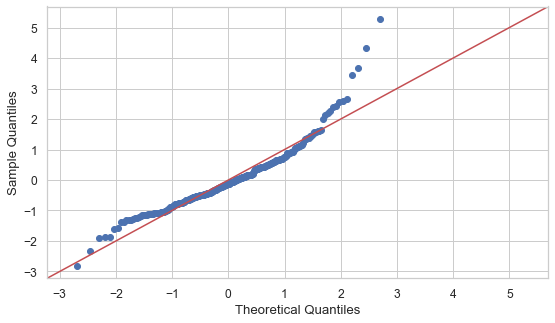

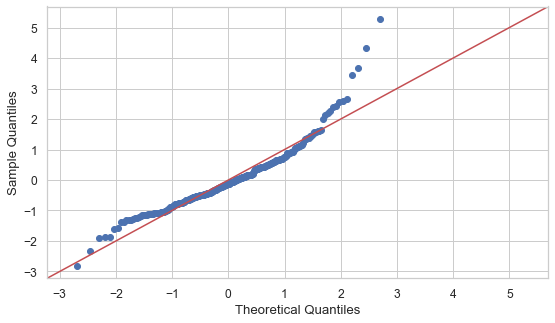

In [161]:
resids_2 = model_2.resid
import scipy.stats as stats

sm.graphics.qqplot(resids_2,stats.norm,line='45',fit=True)

## Removing High P value variables

In [162]:
drop_cols = [col for col in df_filter.columns if 'sqft' in col]
drop_cols.append('price')
drop_cols.append('long')

drop_cols

['sqft_above', 'sqft_basement', 'sqft_lot15', 'price', 'long']

In [163]:
df = df_filter.copy()
for col in drop_cols:
    try:
        df.drop(col,axis=1,inplace=True)
    except:
        print(f"Couldnt drop {col}")

Couldnt drop long


In [164]:
df_filter.columns

Index(['sqft_above', 'sqft_basement', 'sqft_lot15', 'lat_log', 'age_house',
       'bedrooms', 'bathrooms', 'floors', 'yr_renovated', 'waterfront', 'view',
       'condition', 'grade', 'zipcode', 'price'],
      dtype='object')

In [165]:
#X= df
#y = df_filter['price'] 

In [166]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [167]:
#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import cross_val_score
"""
cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))
"""

"\ncv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))\ncv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))\ncv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))\n"

In [168]:
"""
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)
"""

'\nprint(cv_5_results)\nprint(cv_10_results)\nprint(cv_20_results)\n'

### Statsmodel with Zipcode hot-encoded

### Explore House Values by Age

In [169]:
df_norm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'age_house', 'lat_log', 'sqft_living15_log'],
      dtype='object')

In [170]:
df_housing.columns
df_hous_cols = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

df_vis = df_norm

In [171]:
#df_vis.info()

## Factors that Impact the Price of a House

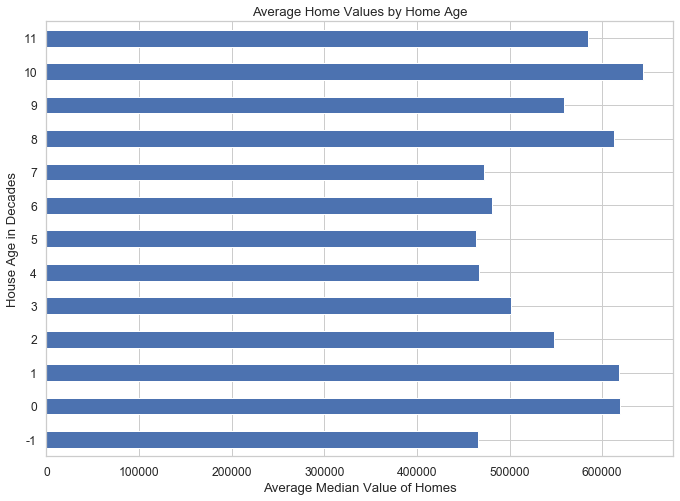

In [172]:
#Explore Home values by age
df_vis['decades'] = df_vis['age_house'] // 10
to_plot = df_vis.groupby('decades').price.mean()
to_plot.plot(kind='barh', figsize=(10,8))
plt.ylabel('House Age in Decades')
plt.xlabel('Average Median Value of Homes')
plt.title('Average Home Values by Home Age');

How does the number of bedrooms in homes have an impact on the price of a home?  What kind of relationship is there between home prices and number of bedrooms.  A statistical analysis shows that the average number
of bedrooms in the dataset is 3.37 bedrooms.  However, when we check this relationship the average number of bedrooms 
does not mean the highest price for a home neither does the highest nubmer og bedrooms.  Based on the scatter plot below it shows that homes with 5 bedrooms consituteded the highest price values.  Still basic logic would tend to show that higher the number of bedrooms the higher hte price of the home.  It actually shows the opposite, in this dataset, after 5 bedrooms it shows that the price of the homes started to decrease pretty drastically.  For example, it showed the homes with 6 bedrooms the median price was in the range of $200,000.<br>
Of course my analysis is made on broad assertions of working with just these 2 columns.  I have not accounted for any data which would have an impact with things such as the overall condition of the home, ie, perhaps home with more bedrooms have not been renovated or maintained properly over the years.<br>

In [173]:
df_vis['bedrooms'].describe()

count    21534.000000
mean         3.373038
std          0.926410
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

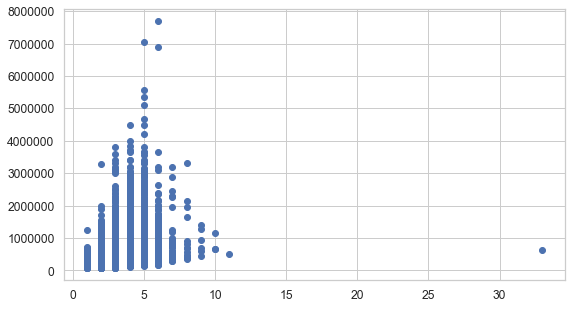

In [174]:
plt.scatter(df_vis['bedrooms'], df_vis['price']);

In [175]:
pivot = df_norm.pivot_table(index='yr_built', values='price', aggfunc=np.median)
pivot

,price
yr_built,
1900,549000.0
1901,550000.0
1902,624000.0
1903,461000.0
1904,478000.0
...,...
2011,440000.0
2012,448475.0
2013,559995.0


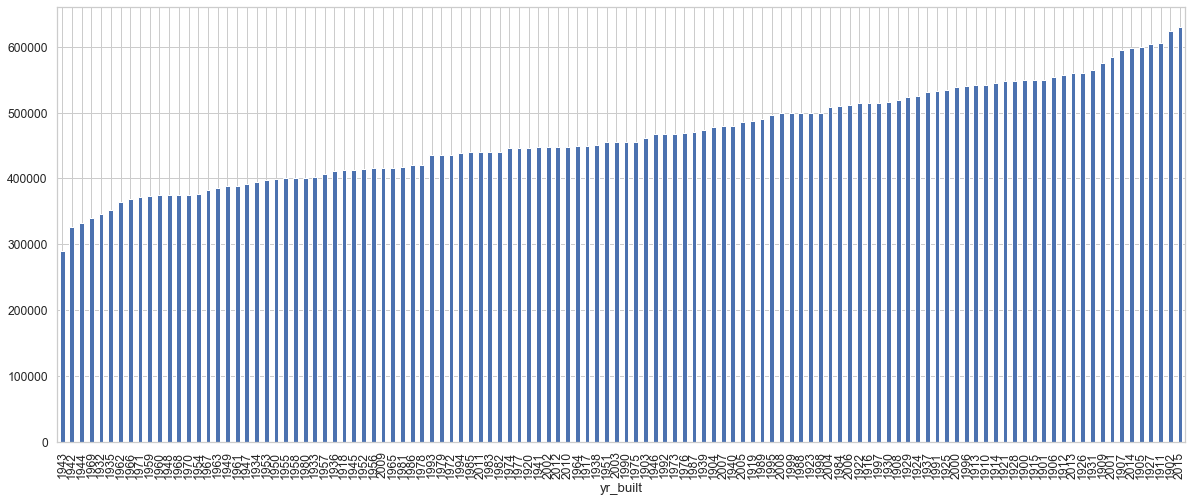

In [176]:
plt.figure(figsize=(18,8))
df_vis['price'].groupby(df_vis['yr_built']).median().sort_values().plot(kind='bar');

Homes prices based on zipcode. The zip code with the highest home value is 98039.  The zipcide with the lowest home prices is 98002.<br>

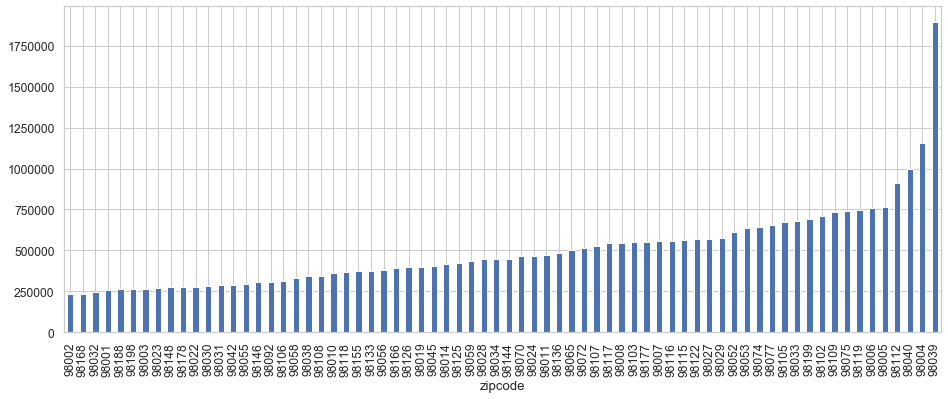

In [177]:
plt.figure(figsize=(14,6));
df_vis['price'].groupby(df_vis['zipcode']).median().sort_values().plot(kind='bar');

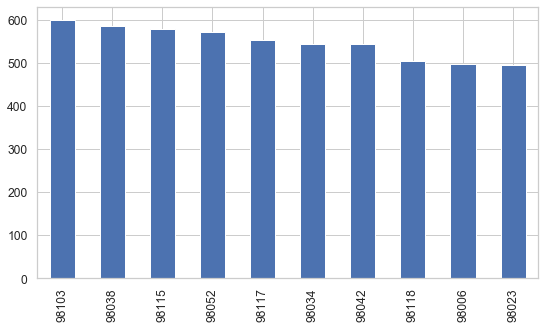

In [178]:
df_vis['zipcode'].value_counts().head(10).plot.bar()

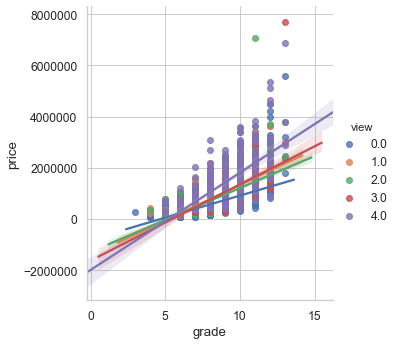

In [179]:
sns.lmplot(x='grade', 
           y='price',
          hue = 'view',
          data = df_vis)

In [180]:
df_vis['grade'].value_counts()

7     8948
8     6053
9     2604
6     2031
10    1130
11     397
5      242
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [181]:
#. 1 poor ,13 excellent.
"""
df_vis['SaleGrade'] = df_vis['price']/df_vis['grade']
plt.hist(df_vis['SaleGrade'], bins=5,color="gold")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');
"""
#df_vis['price'].groupby(df_vis['grade'])

'\ndf_vis[\'SaleGrade\'] = df_vis[\'price\']/df_vis[\'grade\']\nplt.hist(df_vis[\'SaleGrade\'], bins=5,color="gold")\nplt.title("Sale Price per Square Foot")\nplt.ylabel(\'Number of Sales\')\nplt.xlabel(\'Price per square feet\');\n'

### Pivotal Features

In [182]:
#df_vis['grade'].groupby(['price'].mean().sort_values(by='grade', ascending=False))
#df_norm.columns

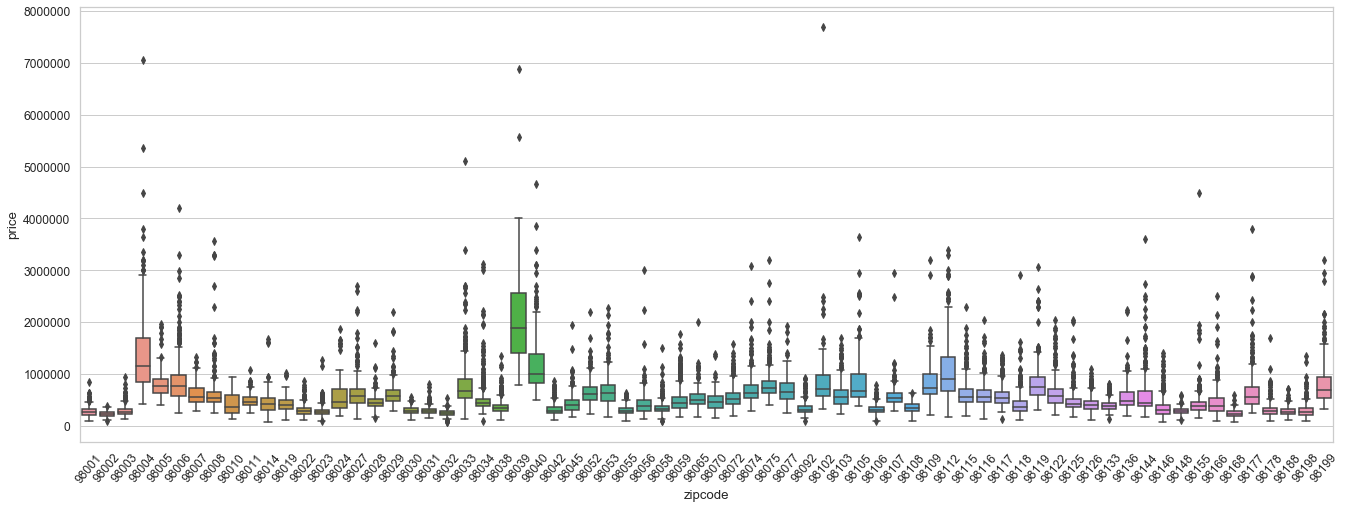

In [183]:
#df_vis[['grade','price']].groupby(['grade'],
#as_index=True).mean().sort_values(by='grade', ascending=False)
fig, axes = plt.subplots(ncols=1, nrows=1,figsize=(20,8))
sns.boxplot(x='zipcode',y='price',data=df_norm)
axes.set_xticklabels(axes.get_xticklabels(),rotation=50);